In [233]:
# import python libraries
import numpy as np
import matplotlib.pyplot as plt

determine the discrete fourier transform and its inverse for the following function:
$$f (t)= f_1 (t)+f_2(t)+f_3(t)$$
with
$$f_1(t) = 2\sin{(2 \pi t)}$$
$$f_2(t) = 2\cos{(2 \pi t)}$$
$$f_3(t) = 2\sin{(2 \pi t)}$$

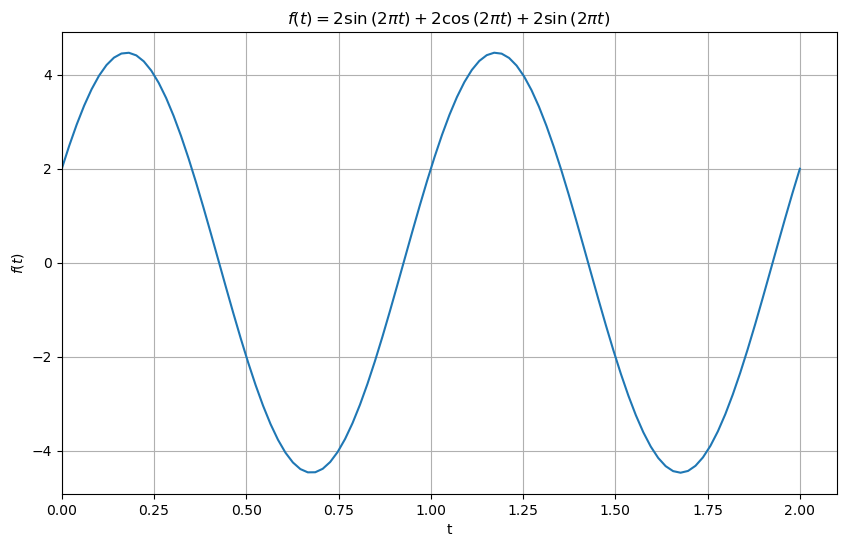

In [234]:
# define the source of signal
def f(t):
    return 2*np.sin(2*np.pi*t) + 2*np.cos(2*np.pi*t) + 2*np.sin(2*np.pi*t)

# plot the signal 
t = np.linspace (0,2,100)
plt.figure (figsize = (10,6))
plt.plot (t, f(t))
plt.title('$f(t)=2\sin{(2 \pi t)} + 2\cos{(2 \pi t)} +2\sin{(2 \pi t)}$')
plt.xlabel ('t')
plt.ylabel ('$f(t)$')
plt.xlim (left = 0)
plt.grid()
plt.show()

The discrete Fourier transform of $f(t)$ is given by
$$g_k = \frac{1}{\sqrt{N}}\sum\limits_{n=0}^{N - 1} f_n e^{-\frac{2i\pi kn}{N}}$$

In [235]:
#perform DFT
t_range = (0,2)

def DFT (f,N = 100):
    # N = Number of sample

    t = np.linspace (0,2,N - 1)

    ft = f(t)

    gk = np.zeros (len (t), dtype = complex)


    for k in range (N - 1):

        for n in range (N - 1):

            gk [k] +=  ft[n] * np.exp(-2j * np.pi *n * k / N)
        
    gk /= np.sqrt (N)


    # range of omega 
    w = np.zeros (N - 1)
    
    for k in range (N - 1):

        w [k] = (2* k* np.pi /2)


    return w, gk


w,g_k = DFT(f)

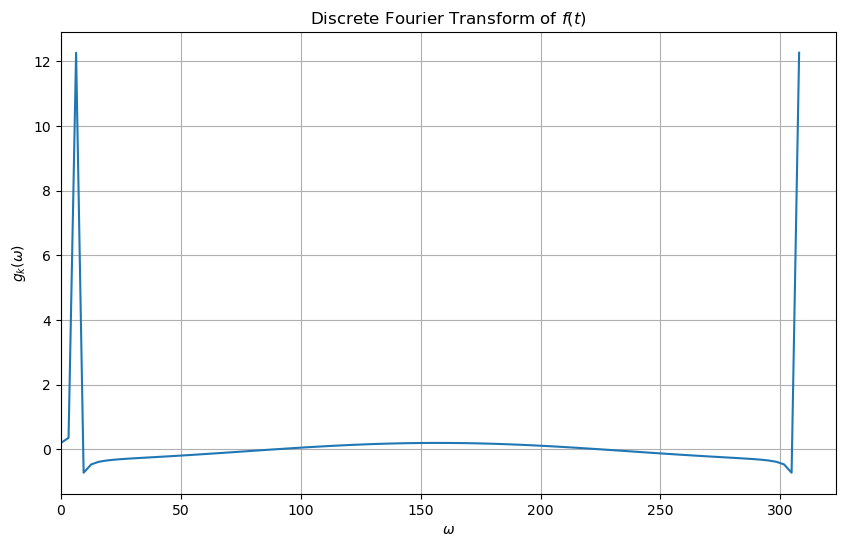

In [236]:
# graph plotting

plt.figure (figsize = (10,6))
plt.plot (w, g_k)
plt.xlim(left = 0)
plt.title ('Discrete Fourier Transform of $f(t)$')
plt.xlabel('$\omega$')
plt.ylabel ('$g_k (\omega)$')
plt.grid()
plt.show()

The inverse Fourier transform:
$$f_n = \frac{1}{\sqrt{N}}\sum\limits_{k=0}^{N - 1} g_k e^{\frac{2i\pi kn}{N}}$$

In [237]:
# perform inverse discrete fourier therom (reconstruct signal)

def IDFT (gk):

    N = len (gk)

    t = np.linspace (0,2,N - 1)

    fn = np.zeros (N - 1, dtype = complex)

    for n in range (N - 1):

        for k in range (N - 1):

            fn [n] += gk [k]*np.exp (2j*np.pi*k*n/N)

    fn /= sqrt (N)

    return t, fn.real

t, f_n = IDFT (g_k)


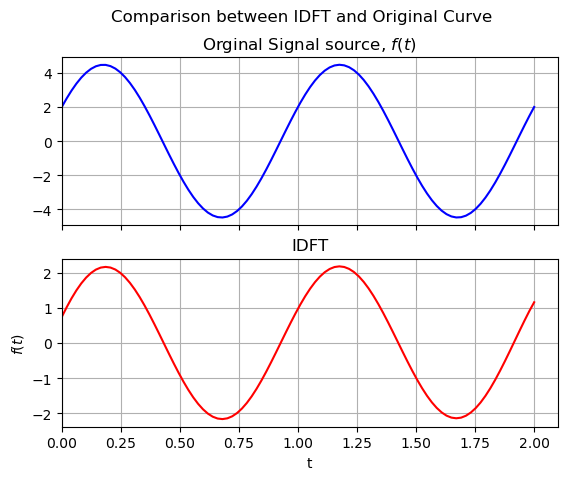

In [238]:
# graph plotting
fig, (ax1,ax2) = plt.subplots(2, sharex = True)

fig.suptitle('Comparison between IDFT and Original Curve')

#original signal source
ax1.plot (t,f(t), color = 'b')
ax1.set_title ('Orginal Signal source, $f(t)$')
ax1.grid()

# reconstructed signal
ax2.plot (t,f_n,color = 'r')
ax2.set_title ('IDFT')
ax2.grid()


plt.xlim (left = 0)
plt.xlabel ('t')
plt.ylabel ('$f(t)$')
plt.show()